In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

IMPORTING THE CSV FILE

In [3]:
df = pd.read_csv('data/stud.csv')
df.shape

(1000, 8)

FIRST FIVE ROWS OF THE DATASET

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

NO MISSING VALUES IN THE DATASET

In [6]:
df.duplicated().sum()

np.int64(0)

NO DUPLICATE VALUES IN THE DATASET

UNIQUE VALUES IN EACH COLUMN OF THE DATASET

In [7]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

STATISTICS OF THE DATASET

In [8]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


UNIQUE VALUES IN EACH COLUMN

In [9]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
gen_val = df['gender'].unique()
print("Categories in gender column is " , gen_val)
gen_val = df['race_ethnicity'].unique()
print("Categories in race_ethnicity column is " , gen_val)
gen_val = df['parental_level_of_education'].unique()
print("Categories in parental_level_of_education column is " , gen_val)
gen_val = df['lunch'].unique()
print("Categories in lunch column is " , gen_val)
gen_val = df['test_preparation_course'].unique()
print("Categories in test_preparation_course column is " , gen_val)

Categories in gender column is  ['female' 'male']
Categories in race_ethnicity column is  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education column is  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch column is  ['standard' 'free/reduced']
Categories in test_preparation_course column is  ['none' 'completed']


NUMERICAL AND CATEGORIAL COLUMNS

In [11]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(include= 'object').columns.tolist()

print('We have {} numerical features : {}'.format(len(num_cols),num_cols))
print('We have {} categorical features : {}'.format(len(cat_cols),cat_cols))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


TOTAL SCORE AND AVERAGE SCORE

In [12]:
df['Total_Score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['Average_Score'] = df['Total_Score'] / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Score,Average_Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


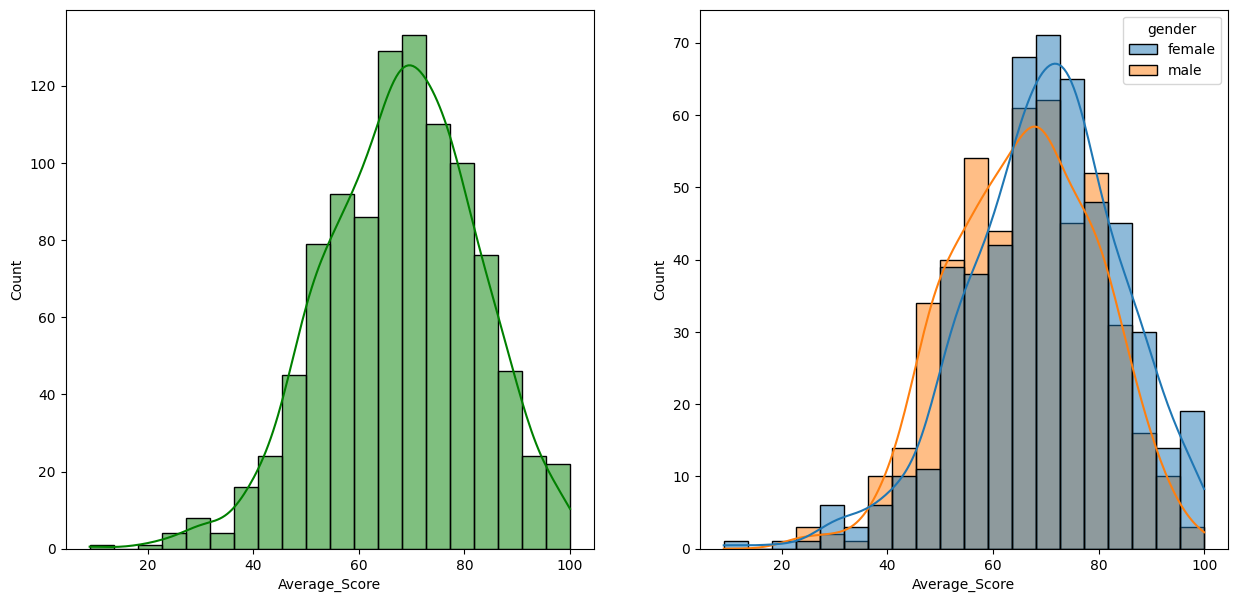

In [14]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Average_Score',bins=20,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average_Score',bins=20,kde=True,hue='gender')
plt.show()


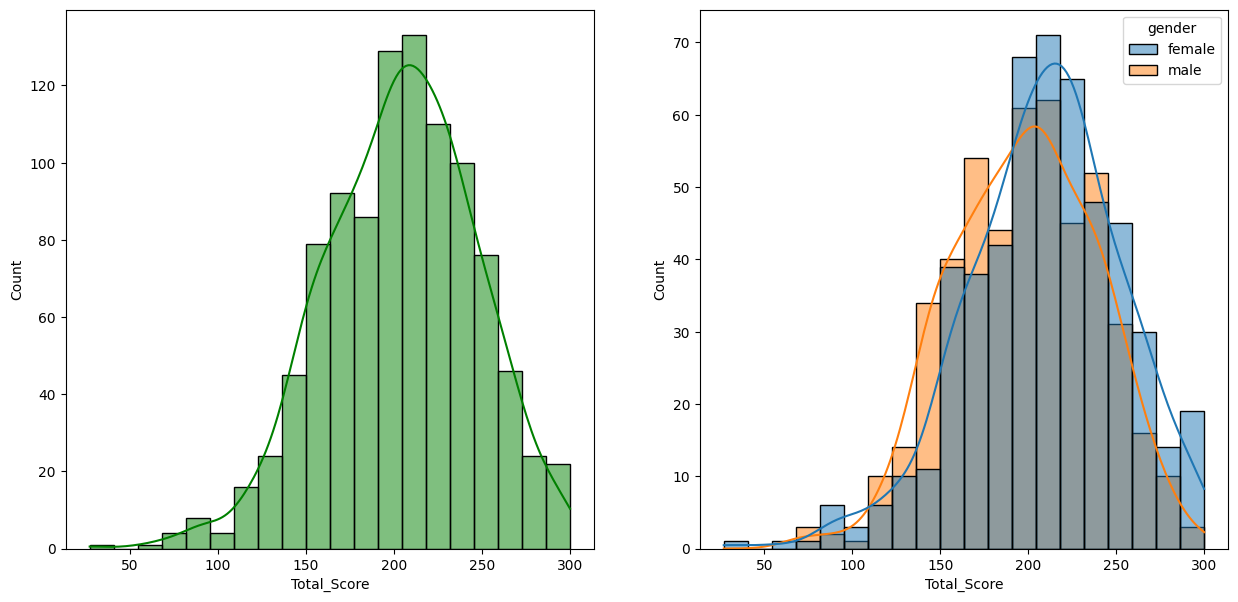

In [15]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Total_Score',bins=20,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Total_Score',bins=20,kde=True,hue='gender')
plt.show()


INSIGHTS : 
    FEMALE STUDENTS HAVE MORE AVERAGE THAN MALE STUDENTS

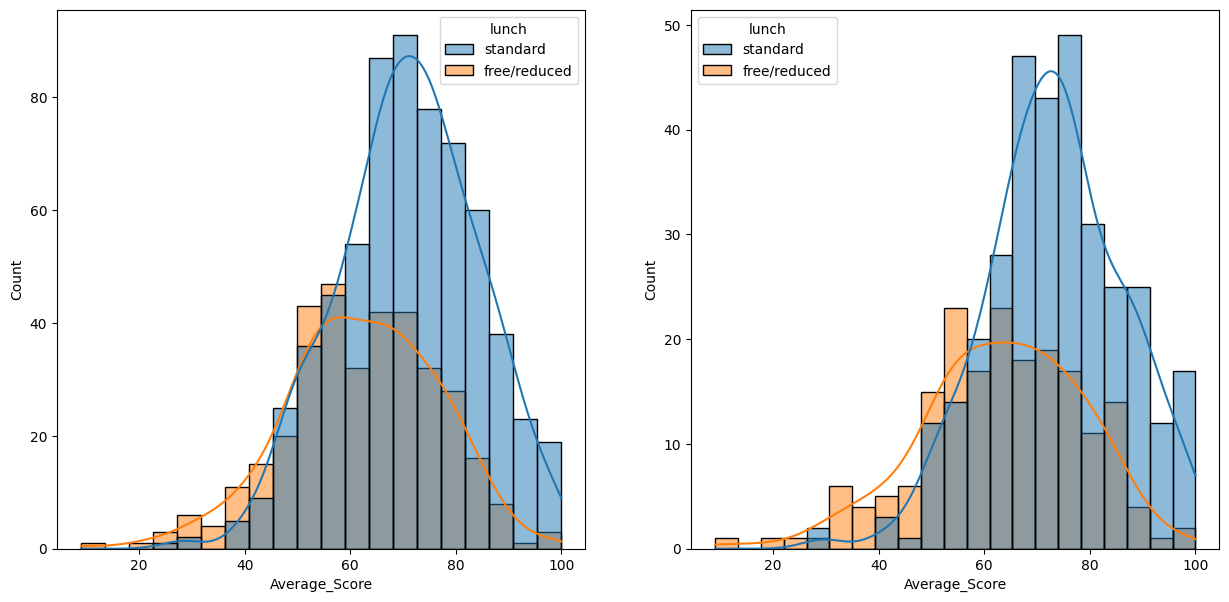

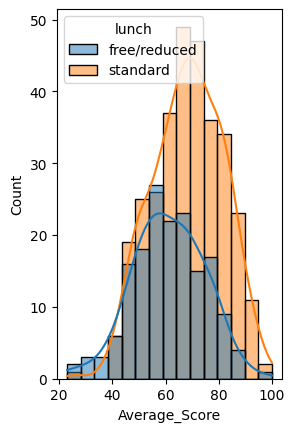

In [20]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Average_Score',bins=20,kde=True,hue='lunch')
plt.subplot(122)
sns.histplot(data=df[df.gender=='female'],x='Average_Score',kde=True,hue='lunch')
plt.show()
plt.subplot(122)
sns.histplot(data=df[df.gender=='male'],x='Average_Score',kde=True,hue='lunch')
plt.show()


STANDARD LUNCH HELPS TO PERFORM WELL IN EXAM FOR BOTH MALE AND FEMALE

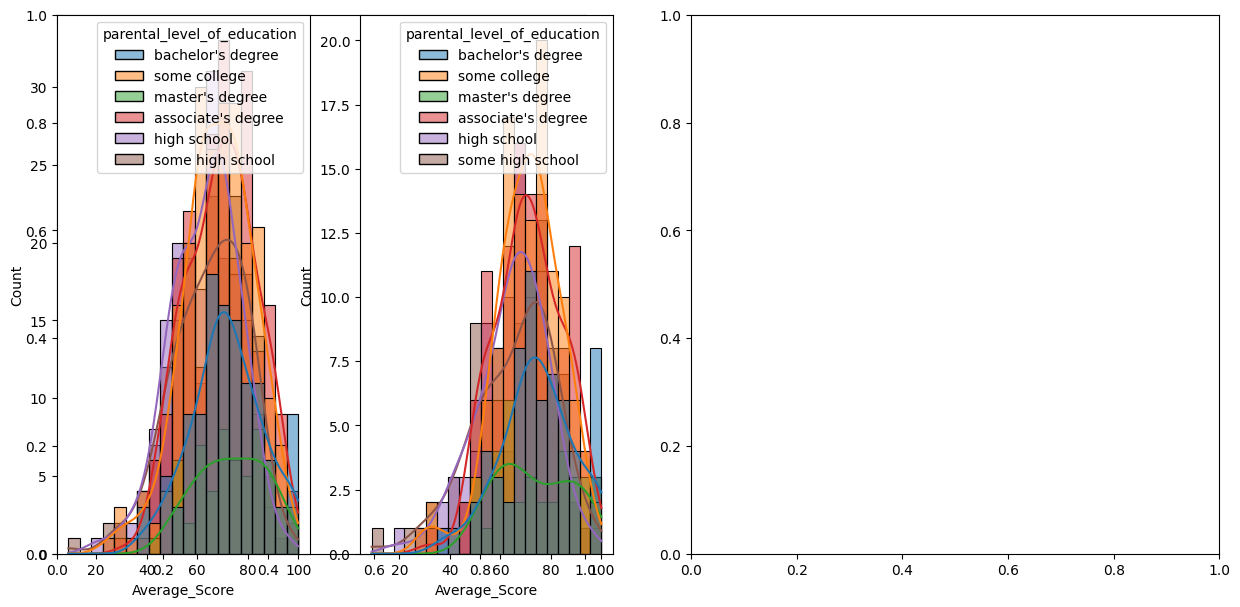

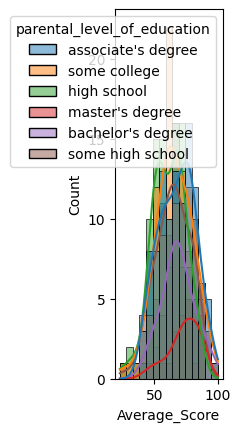

In [21]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(141)
sns.histplot(data=df,x='Average_Score',bins=20,kde=True,hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average_Score',kde=True,hue='parental_level_of_education')
plt.show()
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average_Score',kde=True,hue='parental_level_of_education')
plt.show()


IN GENERAL THERE IS NO EFFECT OF PARENTAL EDUCATION
BUT FOR MALE STUDENTS WHOSE PARENTS HAVE ASSOCIATE DEGREE HAS MORE MARKS.

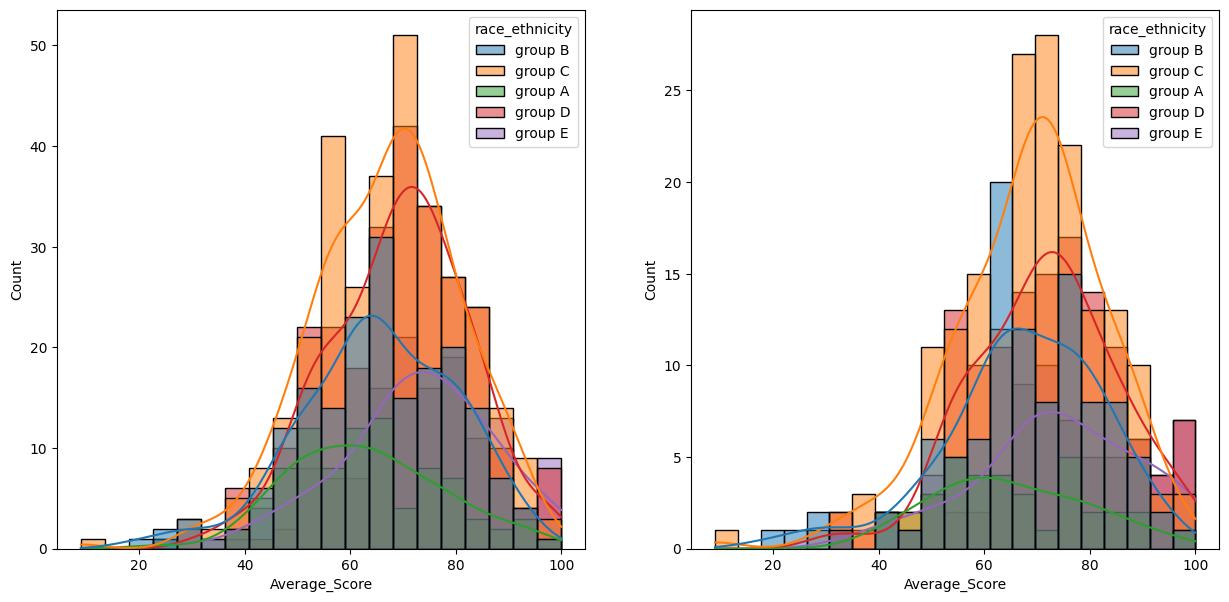

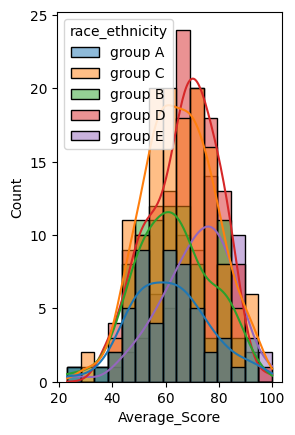

In [23]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Average_Score',bins=20,kde=True,hue='race_ethnicity')
plt.subplot(122)
sns.histplot(data=df[df.gender=='female'],x='Average_Score',kde=True,hue='race_ethnicity')
plt.show()
plt.subplot(122)
sns.histplot(data=df[df.gender=='male'],x='Average_Score',kde=True,hue='race_ethnicity')
plt.show()


GROUP B AND GROUP A STUDENTS ARE PERFORMING LOW IRRESPECTIVE OF GENDER.

<Axes: title={'center': 'WRITING SCORES'}, ylabel='writing_score'>

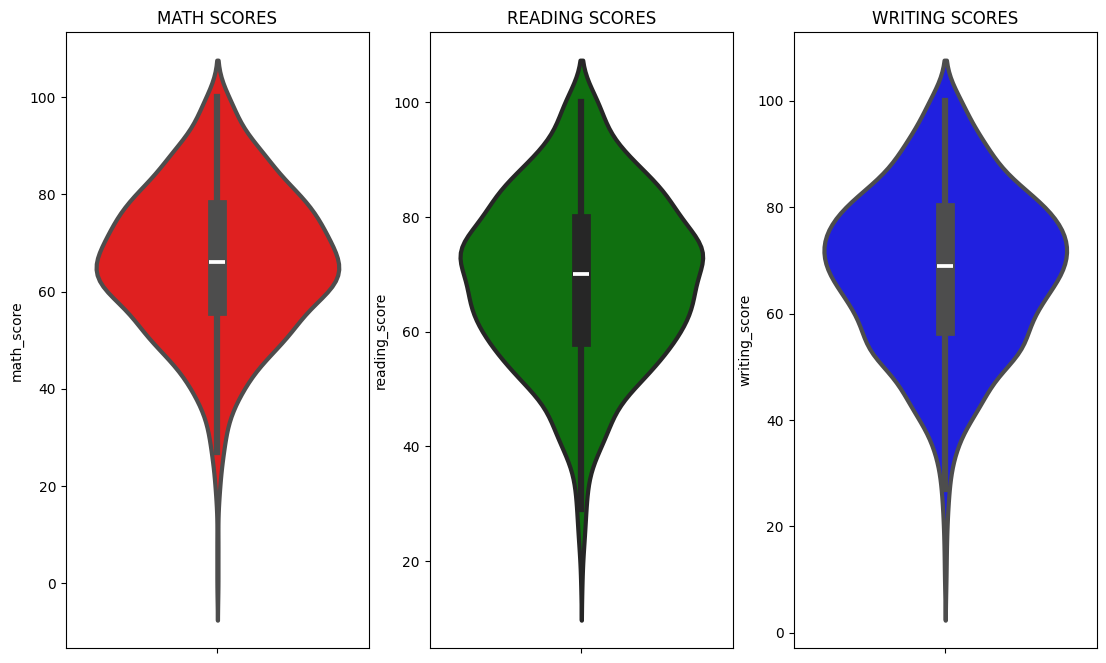

In [26]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('MATH SCORES')
sns.violinplot(y ='math_score',data=df, color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title('READING SCORES')
sns.violinplot(y ='reading_score',data=df, color='green',linewidth=3)
plt.subplot(1,4,3)
plt.title('WRITING SCORES')
sns.violinplot(y ='writing_score',data=df, color='blue',linewidth=3)

MATH SCORE = 60 TO 80
READING AND WRITING SCORE = 50 TO 80

MULTIVARIATE ANALYSIS

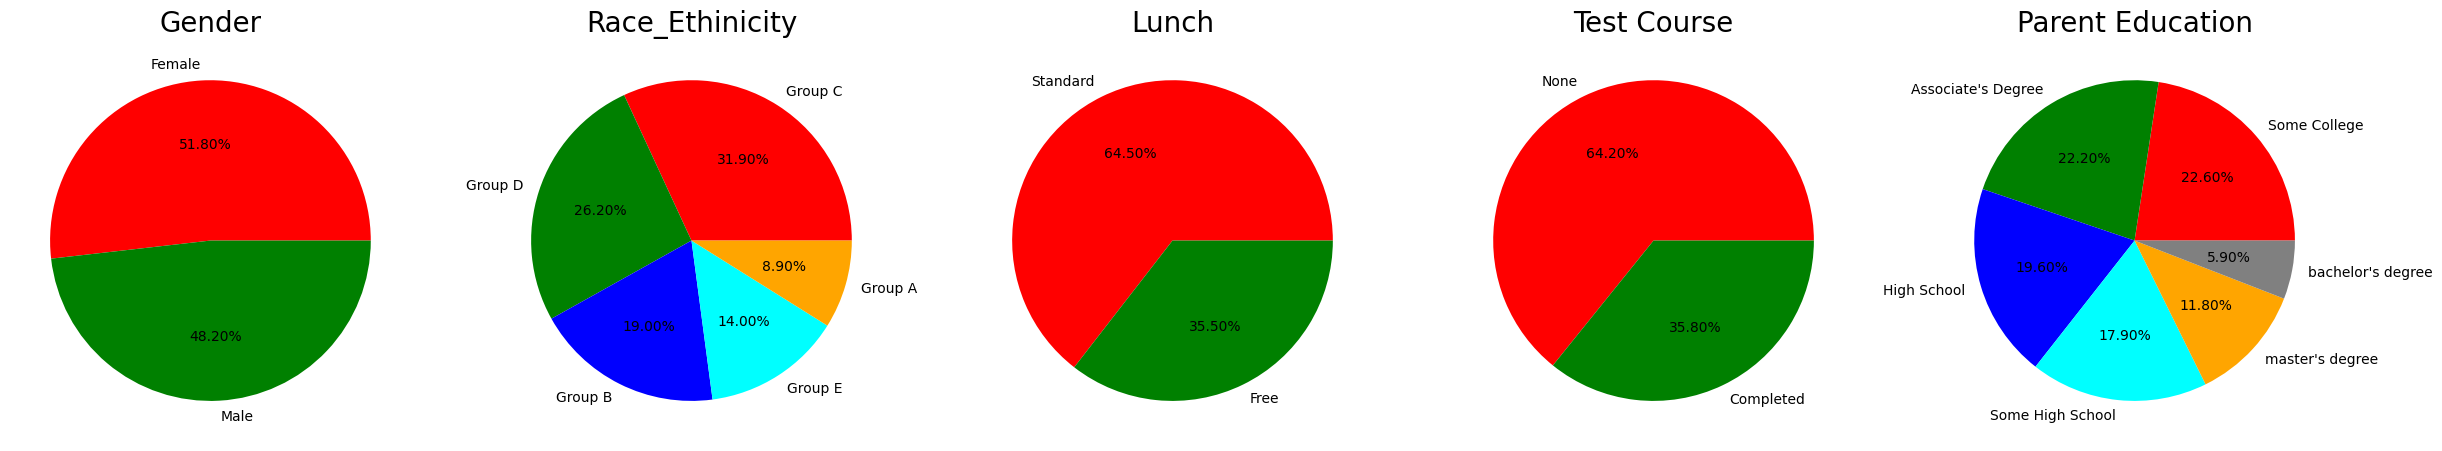

In [41]:
plt.rcParams['figure.figsize'] = (30,12)

plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = 'Female' , 'Male'
color = ['red','green']

plt.pie(size,colors = color, labels = labels, autopct = '%.2f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')


plt.subplot(1,5,2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C' , 'Group D' , 'Group B' , 'Group E' ,'Group A'
color = ['red','green','blue','cyan','orange']

plt.pie(size,colors = color, labels = labels, autopct = '%.2f%%')
plt.title('Race_Ethinicity',fontsize=20)
plt.axis('off')


plt.subplot(1,5,3)
size = df['lunch'].value_counts()
labels = 'Standard' , 'Free'
color = ['red','green']

plt.pie(size,colors = color, labels = labels, autopct = '%.2f%%')
plt.title('Lunch',fontsize=20)
plt.axis('off')



plt.subplot(1,5,4)
size = df['test_preparation_course'].value_counts()
labels = 'None' , 'Completed'
color = ['red','green']

plt.pie(size,colors = color, labels = labels, autopct = '%.2f%%')
plt.title('Test Course',fontsize=20)
plt.axis('off')

plt.subplot(1,5,5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College' , "Associate's Degree" , 'High School' , 'Some High School' ,"master's degree" , "bachelor's degree"
color = ['red','green','blue','cyan','orange' , 'grey']

plt.pie(size,colors = color, labels = labels, autopct = '%.2f%%')
plt.title('Parent Education',fontsize=20)
plt.axis('off')

plt.show()

NO.OF MALE = NO.OF FEMALE STUDENTS 
NUMBER OF STUDENTS ARE GREATESET IN GROUP C
NUMBER OF STUDENTS WITH STANDARD LUNCH ARE GREATER
NUMBER OF STUDENTS DIDN'T ENROLLED IN TEST COURSE IS GREATER
MOST PARENTS EDUCATION IS "SOME COLLEGE" FOLLOWED BY "ASSOCIATE'S DEGREE"

FEATURE WISE ANALYSIS = UNIVARIATE / BIVARIATE

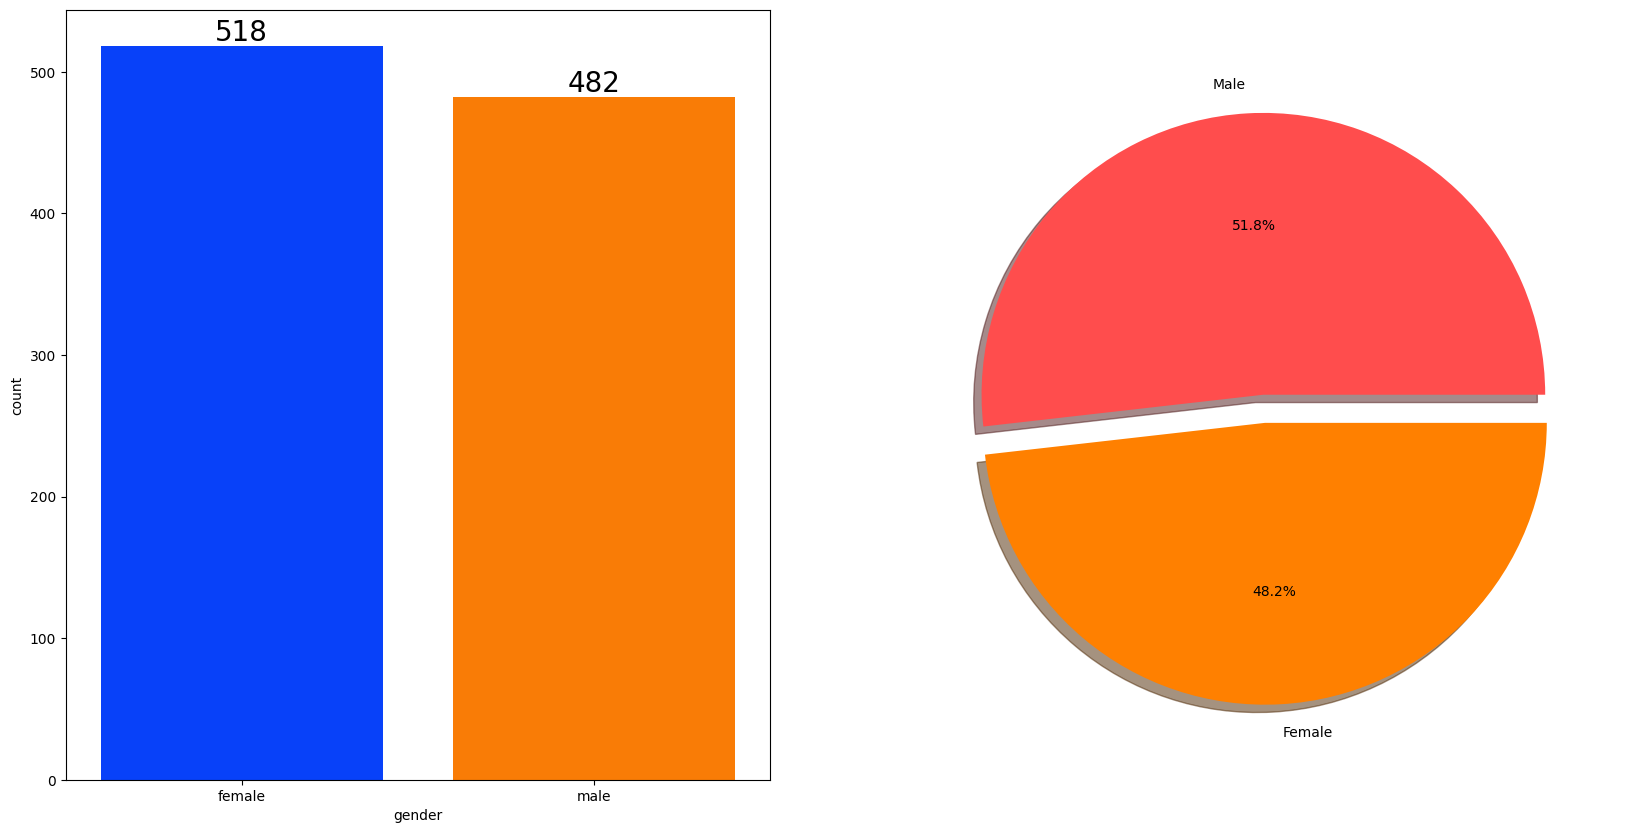

In [42]:

f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

BIVARIATE ANALYSIS

In [53]:
gender_group = df.groupby('gender').mean(numeric_only=True)

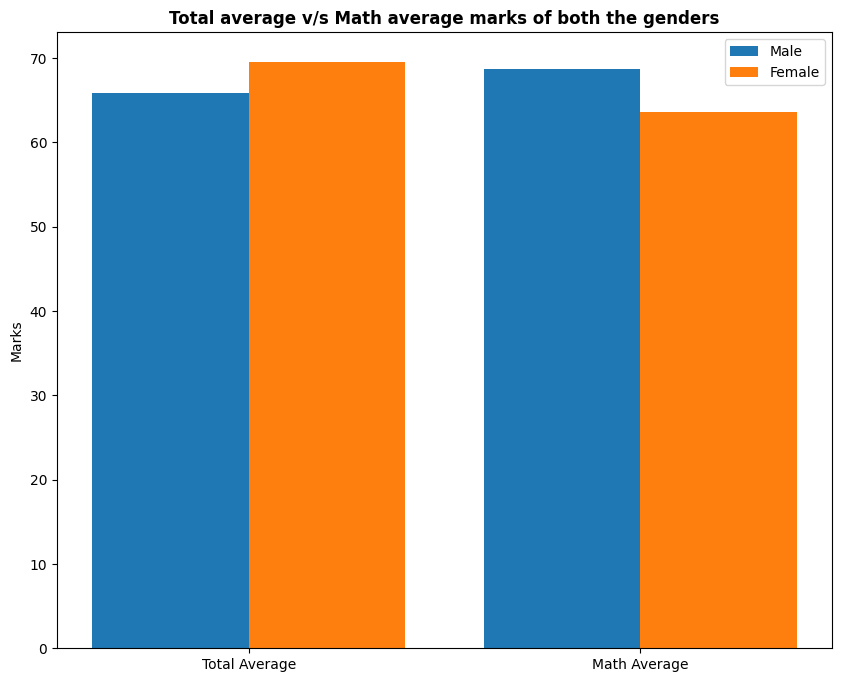

In [56]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['Average_Score']['female'], gender_group['math_score']['female']]
male_scores = [gender_group['Average_Score']['male'], gender_group['math_score']['male']]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

TOTAL AVERAGE SCORE OF FEMALES IS HIGH
BUT AVERAGE SCORE OF MALES IN MATHS IS HIGH

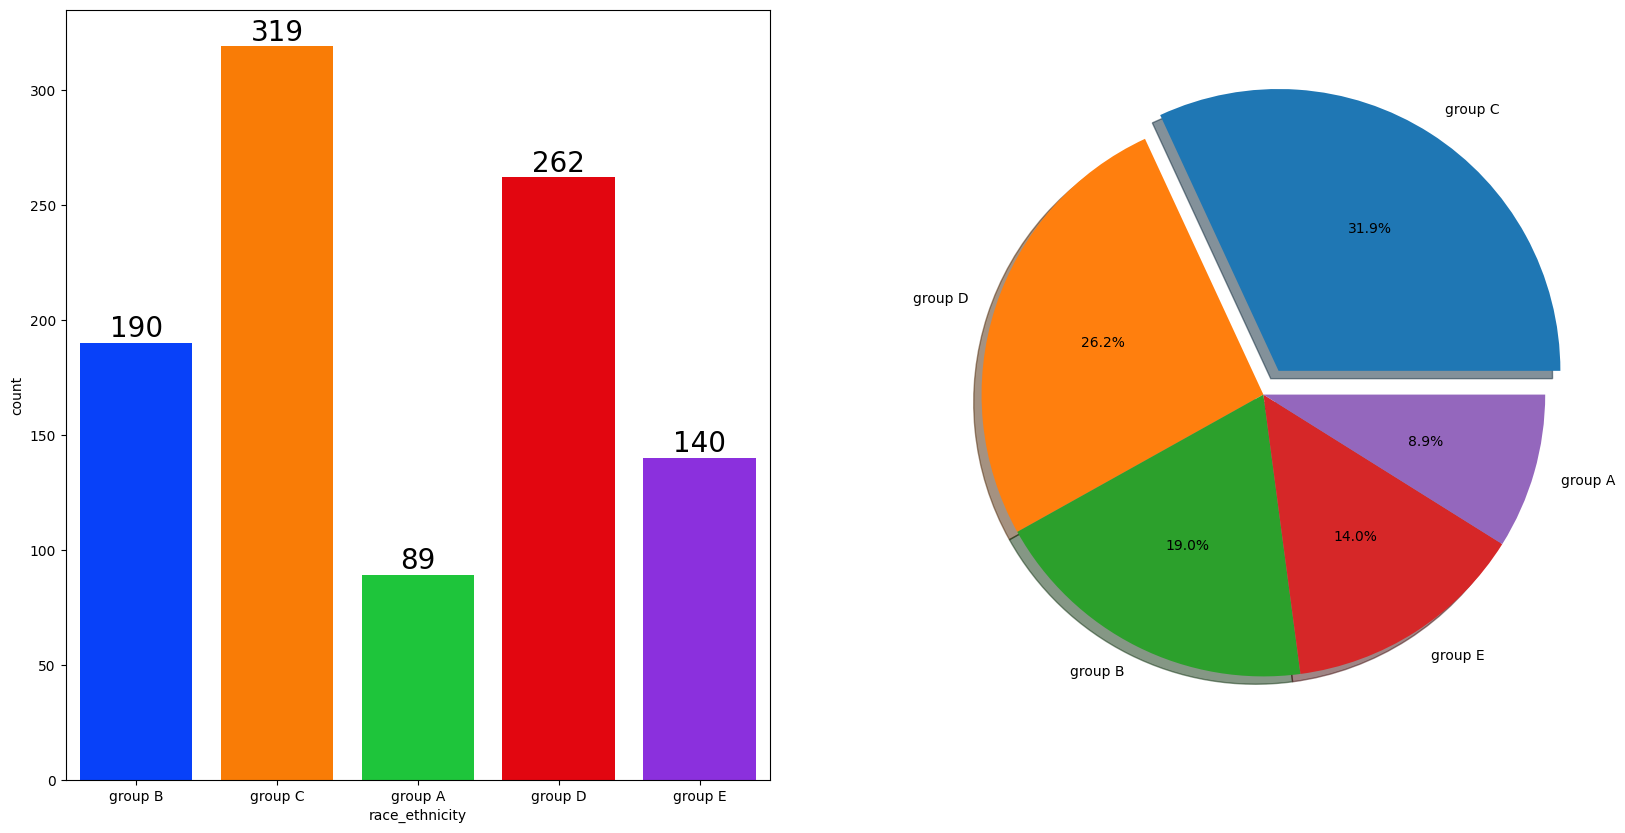

In [58]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

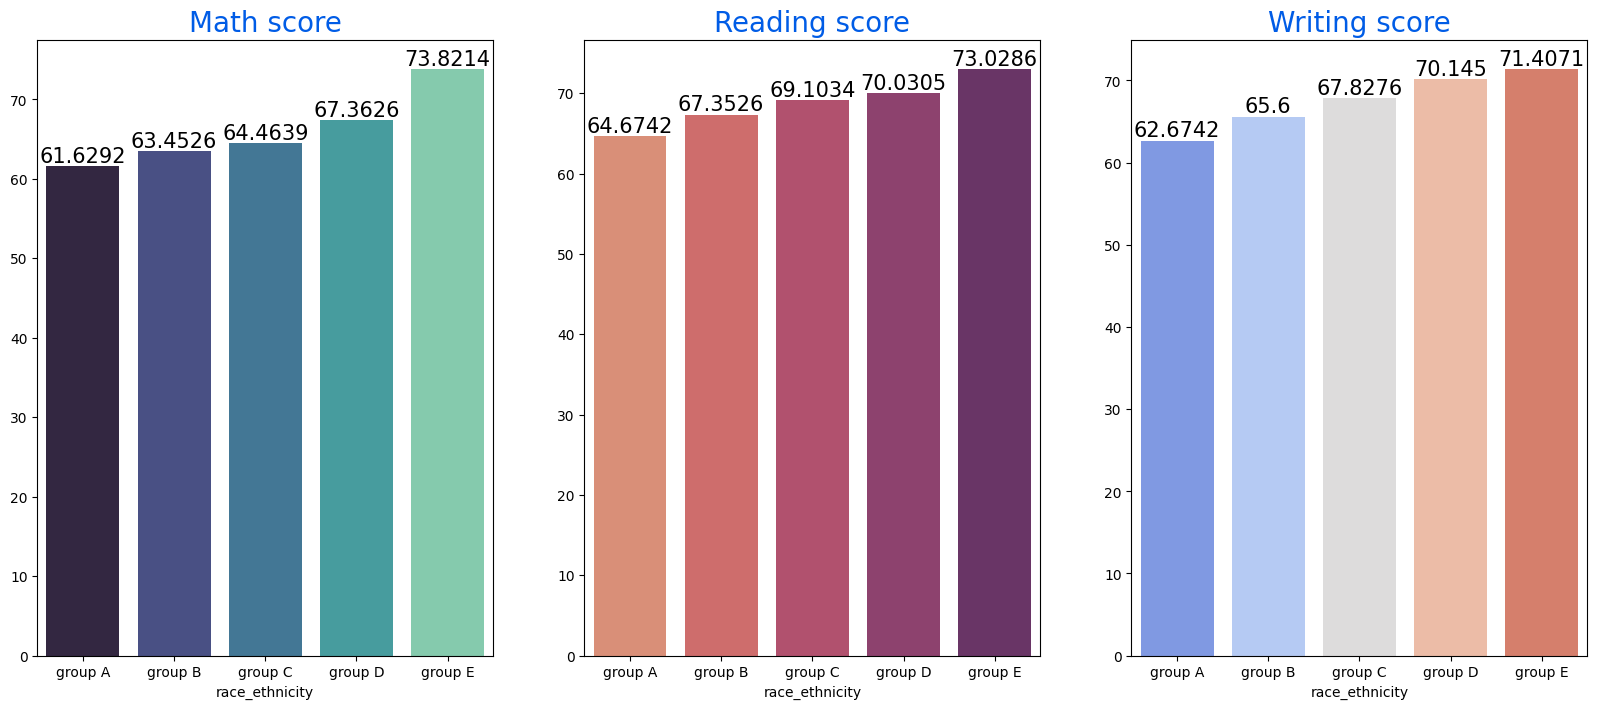

In [60]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

GROUP E HAVE SCORED THE HIGHEST MARK
GROUP A HAVE SCORED THE LOWEST MARK

PARENT EDUCATION - UNIVARIATE

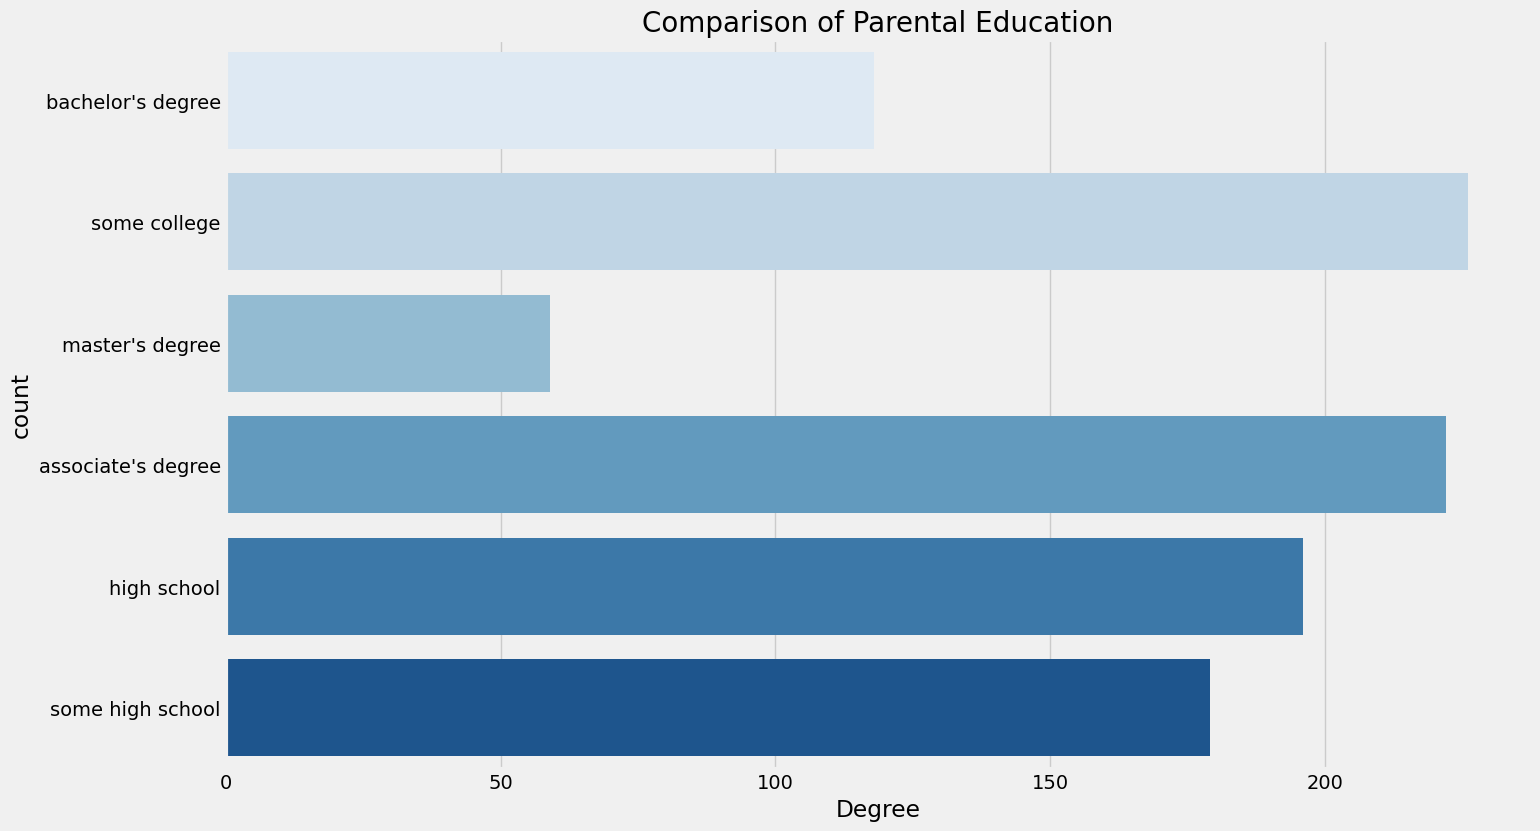

In [62]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

LARGEST NUMBER OF PARENTS ARE FROM SOME COLLEGE

CHECKING OUTLIERS

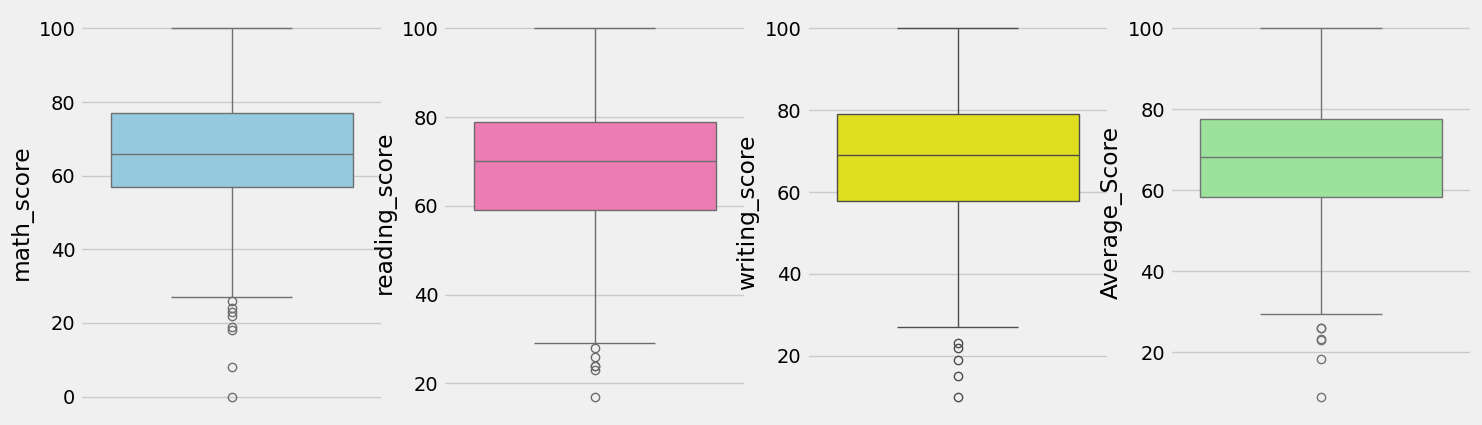

In [73]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Average_Score'],color='lightgreen')
plt.show()

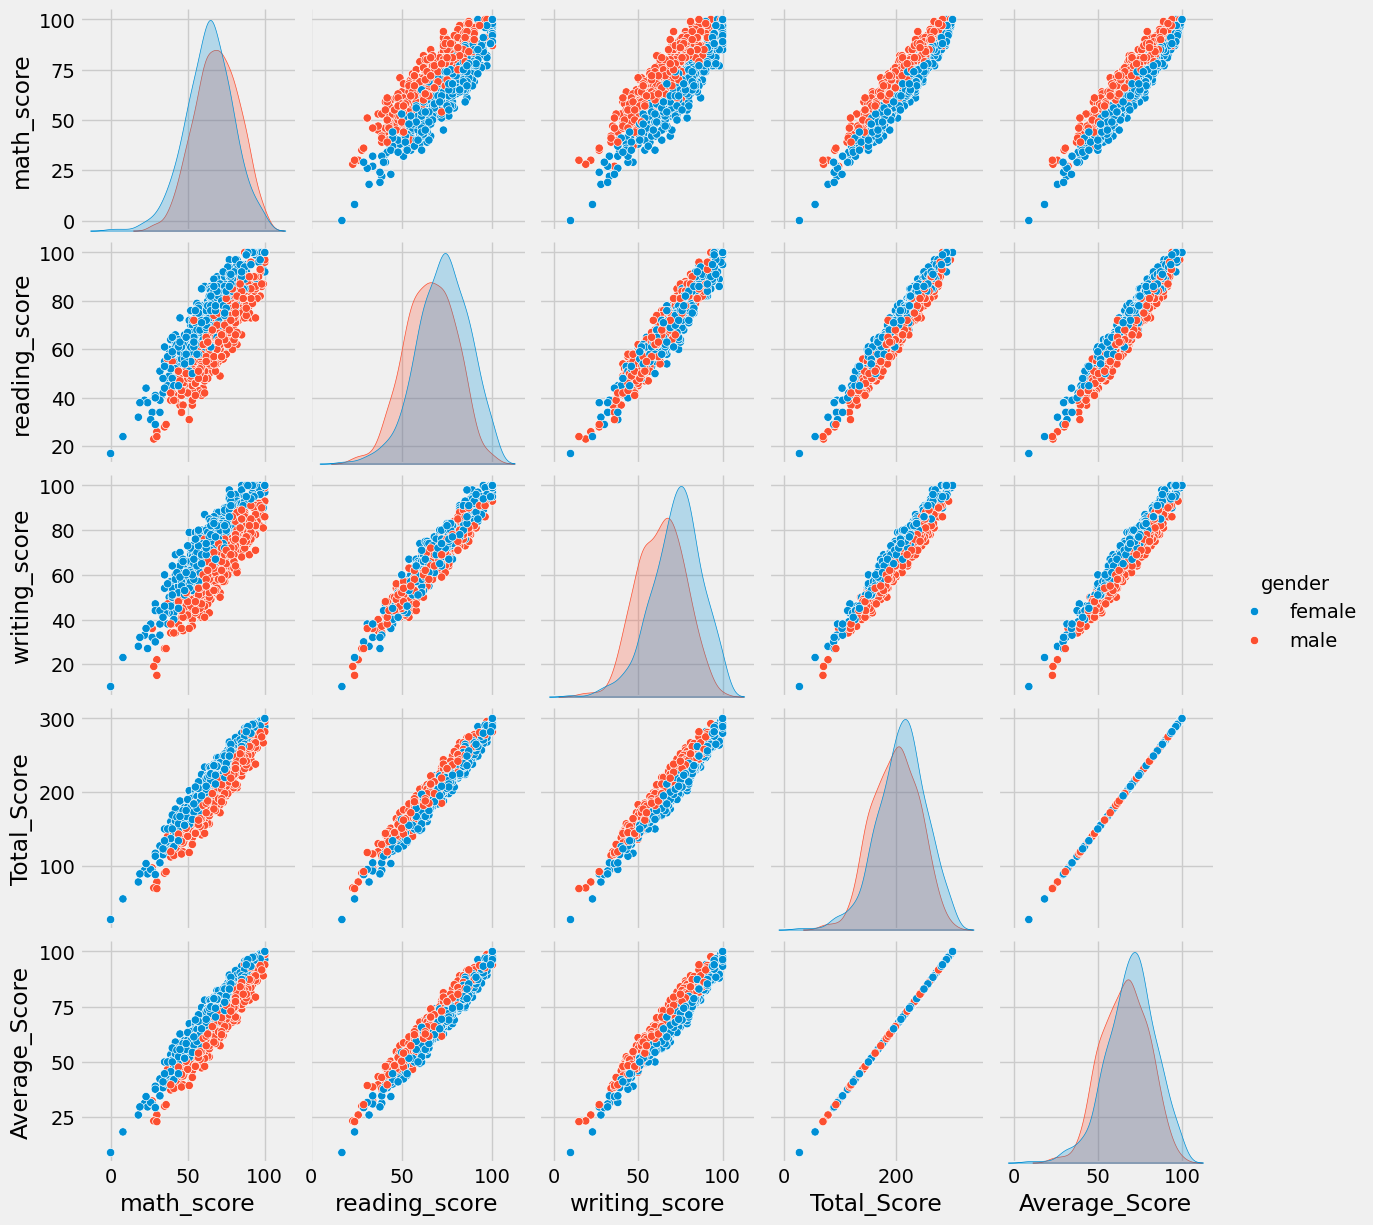

In [74]:
sns.pairplot(df,hue = 'gender')
plt.show()

ALL THE SCORES INCREASE LINEARLY WITH EACH OTHER.

Student's Performance is related with lunch, race, parental level education
Females lead in pass percentage and also are top-scorers
Student's Performance is not much related with test preparation course
Finishing preparation course is benefitial.